In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [14]:
data_path='D:/Robotics Master/Third semester/Thesis_Data/data3/train'

In [15]:
#from sklearn.model_selection import train_test_split

#train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)



image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

training_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=data_path,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

test_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=data_path,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 4877 images belonging to 2 classes.
Found 1218 images belonging to 2 classes.


In [4]:
img_height,img_width = 224,224 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
x=base_model.output

x= GlobalAveragePooling2D()(x)
x= tf.keras.layers.BatchNormalization()(x)
x= Dropout(0.7)(x)
#x= Dense(512,activation='relu')(x) 
x= Dense(4,activation='relu')(x) 
x= tf.keras.layers.BatchNormalization()(x)
x= Dropout(0.7)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer

model=Model(inputs=base_model.input,outputs=preds)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

for layer in model.layers[:143]:
    layer.trainable=False
    
for layer in model.layers[143:]:
    layer.trainable=True


In [6]:
from tensorflow.keras.optimizers import SGD, Adam

# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

checkpoint = [EarlyStopping(monitor='val_loss', patience=10),
              ModelCheckpoint('modelrv2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')]

history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
    callbacks = [checkpoint]
    
    
)



Epoch 1/25
305/305 [==============================] - 284s 795ms/step - loss: 0.6480 - accuracy: 0.7199 - val_loss: 0.6941 - val_accuracy: 0.5271
Epoch 2/25
305/305 [==============================] - 175s 573ms/step - loss: 0.5046 - accuracy: 0.7800 - val_loss: 0.7480 - val_accuracy: 0.5271
Epoch 3/25
305/305 [==============================] - 194s 635ms/step - loss: 0.4543 - accuracy: 0.7958 - val_loss: 0.6698 - val_accuracy: 0.5427
Epoch 4/25
305/305 [==============================] - 192s 630ms/step - loss: 0.4208 - accuracy: 0.8040 - val_loss: 0.4164 - val_accuracy: 0.8202
Epoch 5/25
305/305 [==============================] - 175s 575ms/step - loss: 0.3895 - accuracy: 0.8151 - val_loss: 1.2207 - val_accuracy: 0.5550
Epoch 6/25
305/305 [==============================] - 178s 583ms/step - loss: 0.3632 - accuracy: 0.8243 - val_loss: 0.4674 - val_accuracy: 0.7668
Epoch 7/25
305/305 [==============================] - 179s 587ms/step - loss: 0.3540 - accuracy: 0.8321 - val_loss: 0.5892 -

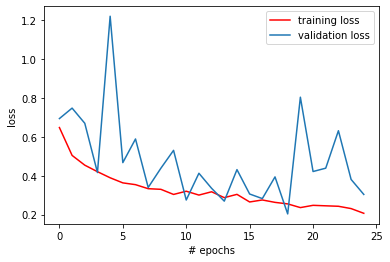

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


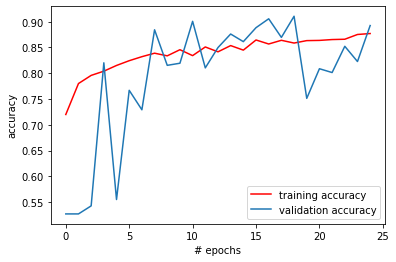

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')

plt.legend()
plt.show()

In [10]:
import tensorflow as tf

from keras.models import load_model
from tensorflow import keras

# Importing the libraries
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np

from keras.preprocessing import image
model = load_model('modelD5-017.model')

face_cascade =cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}


def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    if faces is ():
        return None

    # Crop all faces found
    for (x,y,w,h) in faces:
        #adding rectangle around your face
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face



#Face Recognition with the webcam
'''Extract test face , resize the image to feed to VGG16(224x224x3) , convert to nd-array, predict'''
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()


    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB')

           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)

        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
       

        ""

        if(pred[0][0]>0.5):
            name='NoMask'
        if(pred[0][1]>0.5):
            name='Mask'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0), 2)
   
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\moata\AppData\Local\Temp\ipykernel_15376\1947950969.py:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
